<a href="https://colab.research.google.com/github/RyanAlGhifari2211533014/Pembelajaran-Mesin-Ryan-Al-Ghifari-2211533014/blob/main/Pekan_7_ML_Tugas_Clustering_Hirerichal_Ryan_Al_Ghifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import pandas as pd  # Import the pandas library with the alias 'pd'

df_ = pd.read_csv('Dender.csv')

df = df_.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1113 non-null   int64  
 1   Gender_Code  1107 non-null   object 
 2   Region       1107 non-null   object 
 3   Income       1107 non-null   float64
 4   Spending     1108 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 43.6+ KB


In [ ]:
df

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0
...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0
1109,1110,Male,Urban,48.0,7.0
1110,1111,Male,Urban,31.0,16.0
1111,1112,Male,Urban,50.0,14.0


In [ ]:
print(df.Gender_Code.value_counts(), df.Region.value_counts(), sep='\n')

Gender_Code
Male      572
Female    535
Name: count, dtype: int64
Region
Rural    558
Urban    549
Name: count, dtype: int64


In [ ]:
df['Gender_Code'] = df['Gender_Code'].replace({"Female":1,"Male":0})
df['Region']= df['Region'].replace({"Urban":1, "Rural":0})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1113 non-null   int64  
 1   Gender_Code  1107 non-null   float64
 2   Region       1107 non-null   float64
 3   Income       1107 non-null   float64
 4   Spending     1108 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 43.6 KB


In [ ]:
df = df.fillna(df.mean().round(0))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1113 non-null   int64  
 1   Gender_Code  1113 non-null   float64
 2   Region       1113 non-null   float64
 3   Income       1113 non-null   float64
 4   Spending     1113 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 43.6 KB


<Axes: >

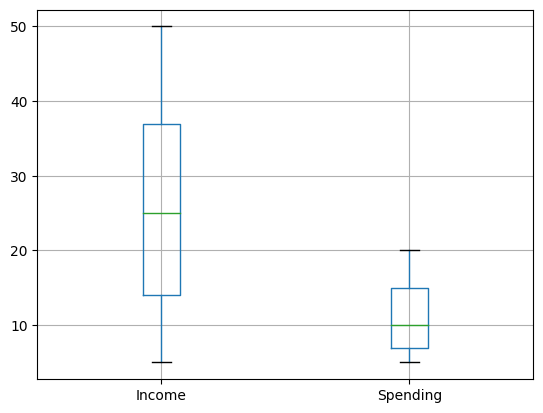

In [ ]:
# 3 detect outlier

pd.DataFrame.boxplot(df.iloc[:,[3,4]])

In [ ]:
df


,ID,Gender_Code,Region,Income,Spending
0,1,1.0,0.0,20.0,15.0
1,2,0.0,0.0,5.0,12.0
2,3,1.0,1.0,28.0,18.0
3,4,0.0,1.0,40.0,10.0
4,5,0.0,1.0,42.0,9.0
...,...,...,...,...,...
1108,1109,1.0,1.0,33.0,16.0
1109,1110,0.0,1.0,48.0,7.0
1110,1111,0.0,1.0,31.0,16.0
1111,1112,0.0,1.0,50.0,14.0


In [ ]:
df = df.iloc[:,2:]
x = df.values

In [ ]:
x

array([[ 0., 20., 15.],
       [ 0.,  5., 12.],
       [ 1., 28., 18.],
       ...,
       [ 1., 31., 16.],
       [ 1., 50., 14.],
       [ 1., 26., 11.]])

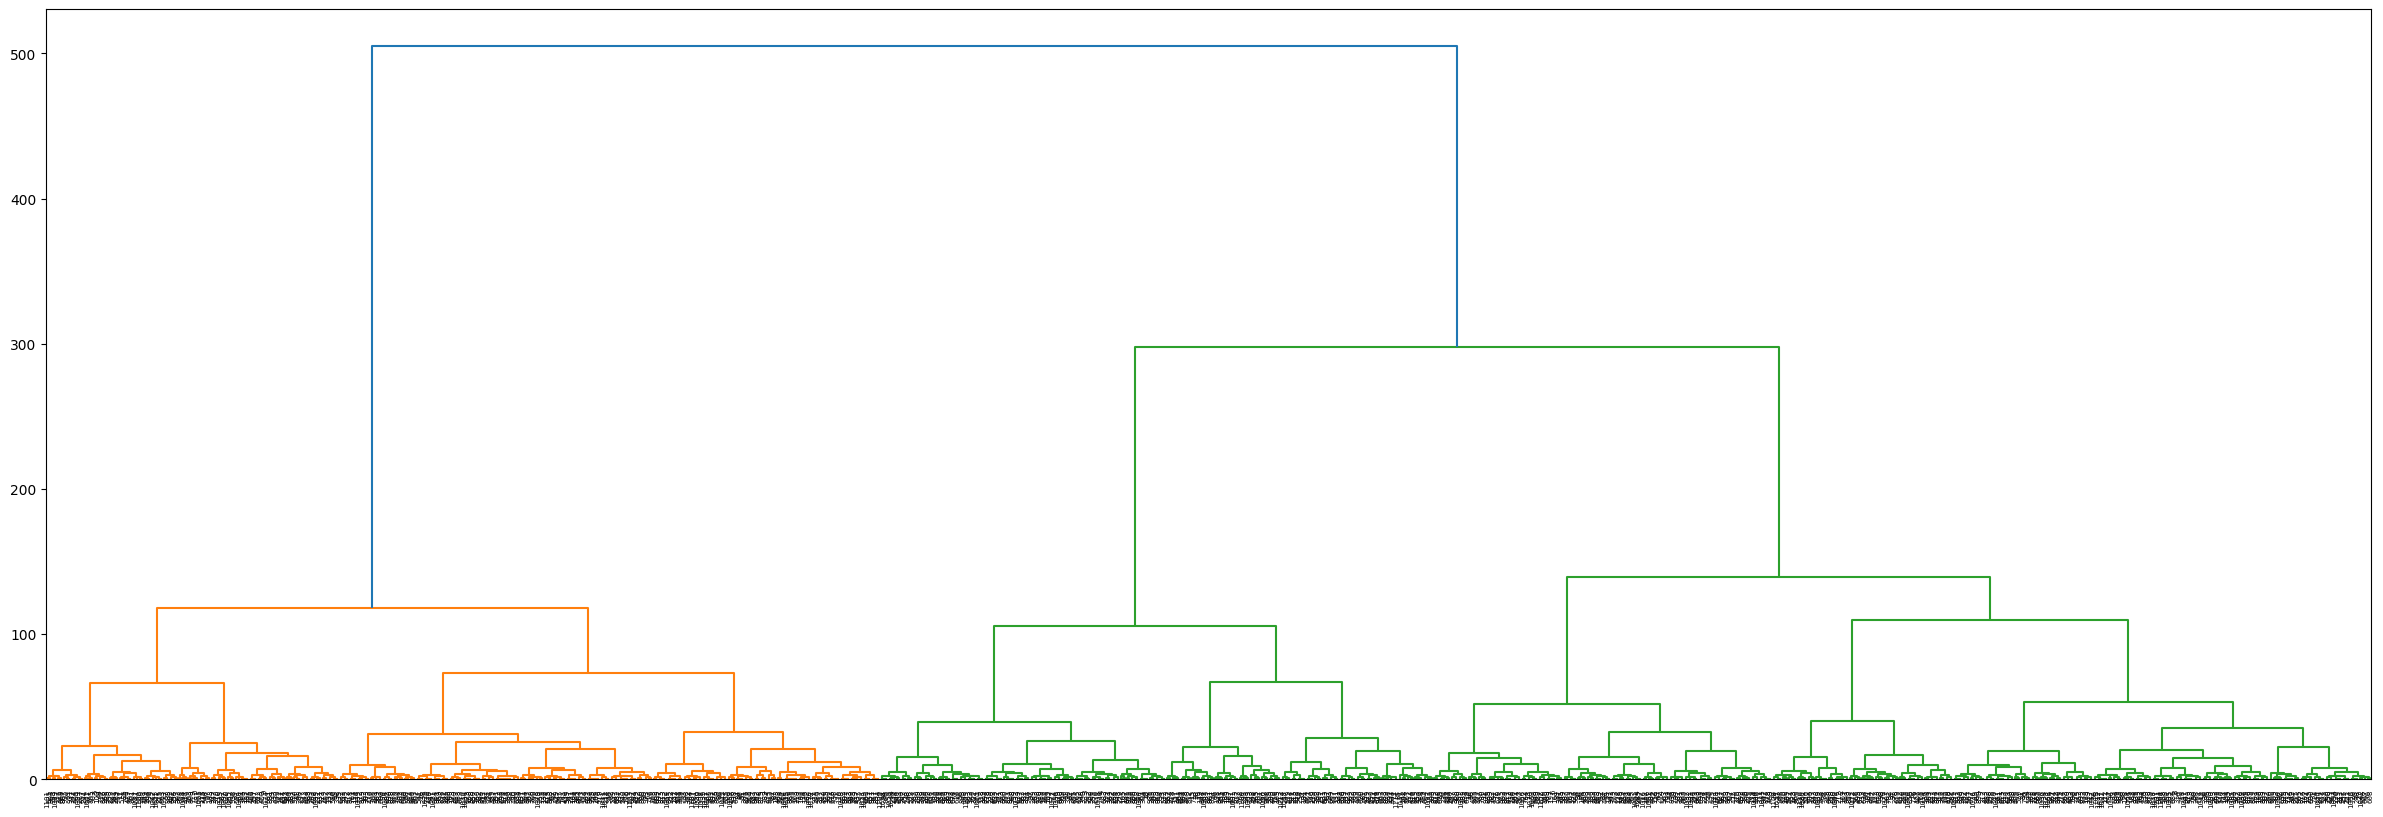

In [ ]:
plt.figure(figsize=(30,10))
dendrogram(linkage(x, method='ward'))
plt.show()

In [ ]:
hc = AgglomerativeClustering(3)
cluster = hc.fit_predict(x)
df['Cluster'] = cluster

df


,Region,Income,Spending,Cluster
0,0.0,20.0,15.0,1
1,0.0,5.0,12.0,1
2,1.0,28.0,18.0,0
3,1.0,40.0,10.0,2
4,1.0,42.0,9.0,2
...,...,...,...,...
1108,1.0,33.0,16.0,0
1109,1.0,48.0,7.0,2
1110,1.0,31.0,16.0,0
1111,1.0,50.0,14.0,2


In [ ]:
df['Cluster'] = df['Cluster'].apply(lambda x: x+1)

df


,Region,Income,Spending,Cluster
0,0.0,20.0,15.0,2
1,0.0,5.0,12.0,2
2,1.0,28.0,18.0,1
3,1.0,40.0,10.0,3
4,1.0,42.0,9.0,3
...,...,...,...,...
1108,1.0,33.0,16.0,1
1109,1.0,48.0,7.0,3
1110,1.0,31.0,16.0,1
1111,1.0,50.0,14.0,3


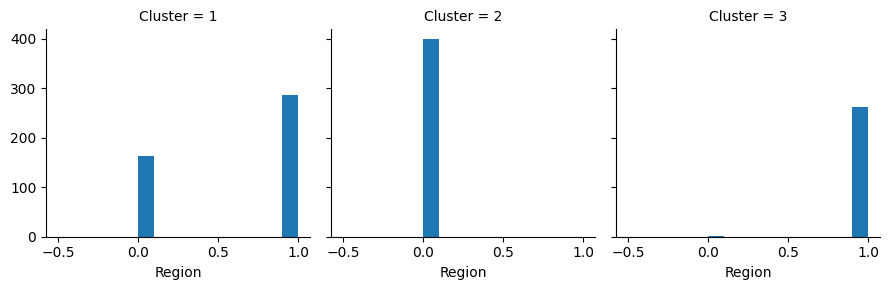

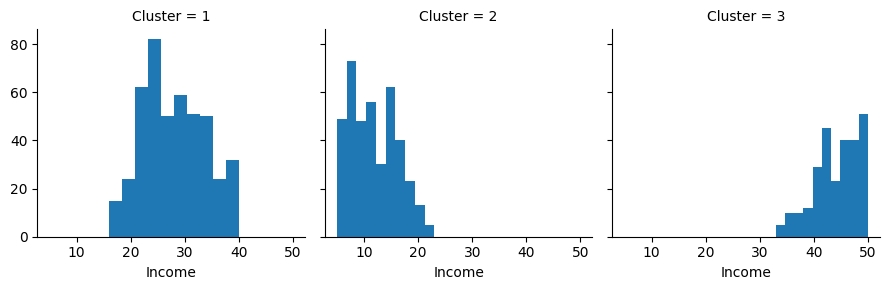

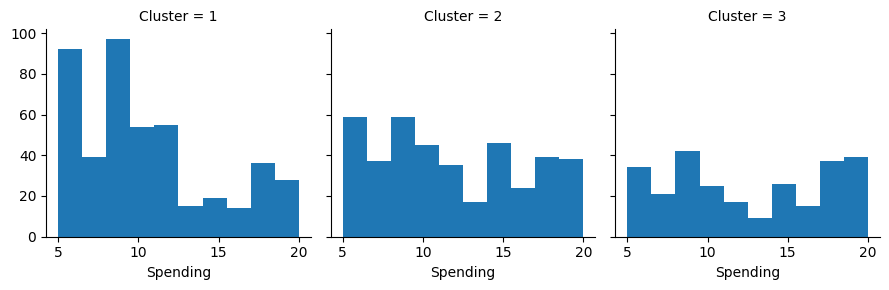

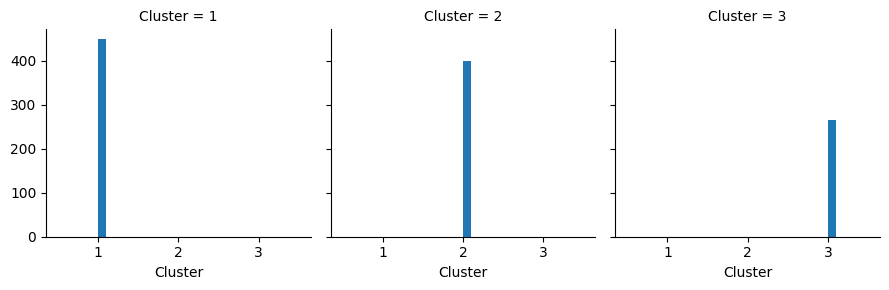

In [ ]:
for c in df:
    grid = sns.FacetGrid(df, col='Cluster')
    grid.map(plt.hist, c)